In [1]:
import pandas as pd
import pandapower as pp
from pandapower import plotting
#import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
#from shapely.geometry import Point, LineString
import math
import numba

In [2]:
#for 1320 pm on June 27 2020
# Create empty network
# https://pandapower.readthedocs.io/en/v2.4.0/elements/empty_network.html
net = pp.create_empty_network()

#lines = gpd.read_file('hv_lines.geojson')

#hv_lines = lines['geometry']

#initialize line voltages in MW assuming ibiza/formentera represented as a load bus

hv220=220
hv132=132
#power factor = 0.9, Q = P*tan(arccos(0.9))
#tan(arccos(0.9))=0.484322
PF= 0.484322


#residential loads in MW for each load bus,weighted avg of population


#initialize bus location variables for geodata epsg.4326

loc_eb=(3.1583316, 39.5822638)
loc_ll=(3.0399121, 39.6736644)
loc_sr=(2.6788739, 39.6511746)
loc_va=(2.5492521, 39.5843260)
loc_so=(2.7442129,39.6002680)
loc_mp=(3.092442,39.809435)
loc_gs=(3.42746869,39.73867947)

loc_cb = (3.83379024,39.93198792)
loc_ciut=(3.8553116,40.0033945)
loc_merc = (4.09591994,39.97708936)
loc_drag = (4.2366714,39.8912109)
loc_mahon = (4.25796449,39.89715096)

loc_ibiza=(1.4310005,38.9192119)

loc_sp=(2.50895716,39.53767893)

loc_cas = (2.7243168,39.5683692)



#Initialize line lengths from qgis, only 220 and 132 lines in KM. 

IB_SP=126 #https://www.ree.es/sites/default/files/01_ACTIVIDADES/Documentos/Romulo2_en.pdf

#mallorca line lengths
SP_Val=6
Val_SR1=15
Val_SR2=15
SR_SO=9
CA_SO = 4
SR_LL=34
SO_LL=29
LL_MTR1=17
LL_MTR2=16
LL_EB1=15
LL_EB2=15
EB_GESA=30

#menorca line lengths
GESA_CB=41
CB_CIUT = 8
drag_mahon = 5
merc_drag = 15
ciut_drag = 36
ciut_merc = 21



In [3]:
#create buses on mallorca

b_eb_lv = pp.create_bus(net, vn_kv=hv132, name = "Es Bessons LV", geodata=loc_eb)
b_eb_hv = pp.create_bus(net, vn_kv=hv220, name = "Es Bessons HV", geodata=loc_eb)

b_ll = pp.create_bus(net, vn_kv=hv220, name = "LLubi", geodata=loc_ll)
b_sr = pp.create_bus(net, vn_kv=hv220, name = "Son Rues", geodata=loc_sr)
b_va = pp.create_bus(net, vn_kv=hv220, name = "Valldurgent", geodata=loc_va)
b_so = pp.create_bus(net, vn_kv=hv220, name = "Son Orlandis", geodata=loc_so)
b_mp = pp.create_bus(net, vn_kv=hv220, name = "Murterar Power", geodata=loc_mp)
b_gs = pp.create_bus(net, vn_kv=hv132, name = "GESA", geodata=loc_gs)

b_cas = pp.create_bus(net, vn_kv=hv220, name = "Cas Tresoare", geodata=loc_cas)

#create buses for menorca (both modelled as load buses on 132kV network)
b_cb = pp.create_bus(net, vn_kv=hv132, name = "Cala en Bosc", geodata=loc_cb)
b_ciut = pp.create_bus(net, vn_kv=hv132, name = "Ciutadella", geodata=loc_ciut)
b_mahon = pp.create_bus(net, vn_kv=hv132, name = "Mahon", geodata=loc_mahon)
b_drag = pp.create_bus(net, vn_kv=hv132, name = "Dragonera SS", geodata=loc_drag)
b_merc = pp.create_bus(net, vn_kv=hv132, name = "Es Merceds SS", geodata=loc_merc)

#create bus representing ibiza/formentera (load bus on 132kV network)
b_ibiza = pp.create_bus(net, vn_kv=hv132, name = "Elvissa PS", geodata=loc_ibiza)

#create buses for mainland interconnector and trafo

b_sp_lv = pp.create_bus(net, vn_kv=hv132, name = "SP HVDC LV", geodata=loc_sp) 
b_sp_hv = pp.create_bus(net, vn_kv=hv220, name = "SP HVDC HV", geodata=loc_sp)

In [4]:
#create load buses
#residential loads in MW for each load bus,weighted avg of population

p_eb=39.53
p_ll=28.23
p_sr=101.9
p_va=98.27
p_so=106.74 
p_mp=39.53
p_gs=22.59
p_sp= 11.29
p_cas=58.74

#menorca load at 1320 is 53MW
p_ciut=13
p_cb = 13
p_mahon= 27

#ibiza and formentera combined load minus generation at 1320. 
p_ibiza=68.1

L_eb = pp.create_load(net, bus=b_eb_lv, p_mw=p_eb, q_mvar=p_eb*PF, name = "Load Es Bessons")
L_ll = pp.create_load(net, bus=b_ll, p_mw=p_ll, q_mvar=p_ll*PF, name = "Load LLubi")
L_sr = pp.create_load(net, bus=b_sr, p_mw=p_sr, q_mvar=p_sr*PF, name = "Load Son Reus")
L_va = pp.create_load(net, bus=b_va, p_mw=p_va, q_mvar=p_va*PF, name = "Load Valldurgent")
L_so = pp.create_load(net, bus=b_so, p_mw=p_so, q_mvar=p_so*PF, name = "Load Son Orlandis")
L_mp = pp.create_load(net, bus=b_mp, p_mw=p_mp, q_mvar=p_mp*PF, name = "Load Murtretar") 
L_gs = pp.create_load(net, bus=b_gs, p_mw=p_gs, q_mvar=p_gs*PF, name = "Load GESA")
L_sp = pp.create_load(net, bus=b_sp_lv, p_mw=p_sp, q_mvar=p_sp*PF, name = "Load Santa Ponsa")
l_cas =pp.create_load(net, bus=b_cas, p_mw=p_cas, q_mvar=p_cas*PF, name = "Load Cas Tresoare")

L_cb = pp.create_load(net, bus=b_cb, p_mw=p_cb, q_mvar=p_cb*PF, name = "Load Cala en bosc")
L_ciut = pp.create_load(net, bus=b_ciut, p_mw=p_ciut, q_mvar=p_ciut*PF, name = "Load ciutadella")
L_mahon = pp.create_load(net, bus=b_drag, p_mw=p_mahon, q_mvar=p_mahon*PF, name = "Load mahon")

L_ibiza = pp.create_load(net, bus=b_ibiza, p_mw=p_ibiza, q_mvar=p_ibiza*PF, name = "Load Ibiza/Formentera")

L_sp = pp.create_load(net, bus=b_sp_lv, p_mw=0, q_mvar=237, name = "Reactor")


net.load.tail()

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
9,Load Cala en bosc,9,13.0,6.296186,0.0,0.0,NaN,1.0,True,wye
10,Load ciutadella,10,13.0,6.296186,0.0,0.0,NaN,1.0,True,wye
11,Load mahon,12,27.0,13.076694,0.0,0.0,NaN,1.0,True,wye
12,Load Ibiza/Formentera,14,68.1,32.982328,0.0,0.0,NaN,1.0,True,wye
13,Reactor,15,0.0,237.000000,0.0,0.0,NaN,1.0,True,wye


In [5]:
#define generation at 120pm on mallorca

P_ccgt = 316.2
P_trash = 29.3
P_cogen = 3.2
P_solar = 38.6

#define Menorca generation 32.6MW DIESEL 21.8MW GT (.1 wind, 1.1 solar, all into grid at mahon)
P_MDG = 55.5 

#create generator buses
#pandapower.create_sgen(net, bus, p_mw, q_mvar=0, sn_mva=nan, name=None)

#gen_cas = pp.create_sgen(net, bus = b_cas, p_mw = P_ccgt/2+P_cogen , q_mvar=  (P_ccgt/2+P_cogen)*PF , name = "Cas Tresoer Gas Turbine")
#gen_sr = pp.create_sgen(net, bus = b_sr, p_mw = P_ccgt/2+P_trash, q_mvar=(P_ccgt/2+P_trash)*PF , name = "Son Reus GT and Waste")

gen_sr = pp.create_sgen(net, bus = b_sr, p_mw = P_ccgt+P_trash+P_cogen, q_mvar=(P_ccgt+P_trash+P_cogen)*PF , name = "Son Reus GT and Waste")
gen_solar = pp.create_sgen(net, bus = b_ll, p_mw = P_solar, q_mvar=0, name = "LLubi PV")
gen_mahon = pp.create_sgen(net, bus = b_mahon, p_mw = P_MDG, q_mvar = P_MDG*PF, name = 'Mahon Diesel Gen')


#gen_cas = pp.create_gen(net, bus = b_cas, p_mw = P_ccgt/2+P_cogen, vm_pu = 1.00, name = "Cas Tresoer Gas Turbine")
#gen_sr = pp.create_gen(net, bus = b_sr, p_mw = P_ccgt/2+P_trash, vm_pu = 1.00, name = "Son Reus GT and Waste")
#gen_solar = pp.create_gen(net, bus = b_ll, p_mw = P_solar, vm_pu = 1.00, name = "LLubi PV")
#gen_mahon = pp.create_gen(net, bus = b_mahon, p_mw = P_MDG, vm_pu = 1.00, name = 'Mahon Diesel Gen')

#create swing bus to represent HVDC cable

swing_hvdc = pp.create_ext_grid(net, bus=b_sp_hv, vm_pu=1.00, name="Cometa Swing Bus")

net.sgen.tail()

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,Son Reus GT and Waste,3,348.7,168.883081,NaN,1.0,True,wye,True
1,LLubi PV,2,38.6,0.000000,NaN,1.0,True,wye,True
2,Mahon Diesel Gen,11,55.5,26.879871,NaN,1.0,True,wye,True


In [6]:
#create 220 to 132kV transformers at es bessons and santa ponsa, typical capacity zotero
trans_sp = pp.create_transformer_from_parameters(net, hv_bus=b_sp_hv, lv_bus=b_sp_lv, sn_mva=400, vn_hv_kv=220,\
                                                  vn_lv_kv=132, vkr_percent=1, vk_percent=10, pfe_kw=400.*0.01, i0_percent=1)

trans_eb = pp.create_transformer_from_parameters(net, hv_bus=b_eb_hv, lv_bus=b_eb_lv, sn_mva=400, vn_hv_kv=220,\
                                                  vn_lv_kv=132, vkr_percent=1, vk_percent=10, pfe_kw=400*0.01, i0_percent=1)

In [7]:

#Define power requirements depending on chosen locations
ibiza_PV_Power = 210
ibiza_PV    = pp.create_sgen(net, bus = b_ibiza , p_mw = ibiza_PV_Power, q_mvar = 0 , name = "ibiza PV")

LLubi_PV_Power = 310
LLubi_PV    = pp.create_sgen(net, bus = b_ll , p_mw = LLubi_PV_Power, q_mvar = 0 , name = "LLubi PV")

Mahon_PV_Power = 120
Mahon_PV    = pp.create_sgen(net, bus = b_drag , p_mw = Mahon_PV_Power, q_mvar = 0 , name = "Mahon PV")

Son_Reus_PV_Power = 310
Son_Reus_PV    = pp.create_sgen(net, bus = b_sr , p_mw = Son_Reus_PV_Power, q_mvar = 0 , name = "Son Reus PV")

Valldurgent_PV_Power = 310
Valldurgent_PV    = pp.create_sgen(net, bus = b_va , p_mw = Valldurgent_PV_Power, q_mvar = 0 , name = "Valldurgent PV")

Son_Orlandis_PV_Power = 240
Son_Orlandis_PV = pp.create_sgen(net, bus = b_so , p_mw = Son_Orlandis_PV_Power, q_mvar = 0 , name = "Son Orlandis PV")


#bus=b_sr, p_mw=p_sr, q_mvar=p_sr*PF, name = "Load Son Reus"
#L_va = pp.create_load(net, bus=b_va, p_mw=p_va, q_mvar=p_va*PF, name = "Load Valldurgent")
#L_so = pp.create_load(net, bus=b_so, p_mw=p_so, q_mvar=p_so*PF, name = "Load Son Orlandis")
#L_mp = pp.create_load(net, bus=b_mp, p_mw=p_mp, q_mvar=p_mp*PF, name = "Load Murtretar") 
#L_gs = pp.create_load(net, bus=b_gs, p_mw=p_gs, q_mvar=p_gs*PF, name = "Load GESA")
#L_sp = pp.create_load(net, bus=b_sp_lv, p_mw=p_sp, q_mvar=p_sp*PF, name = "Load Santa Ponsa")
#l_cas =pp.create_load(net, bus=b_cas, p_mw=p_cas, q_mvar=p_cas*PF, name = "Load Cas Tresoare


#Son_Reus_PV_Power = 120
#Son_Reus_PV =  pp.create_sgen(net, bus = Son_Reus_bus , p_mw = Son_Reus_PV_Power, q_mvar =  Son_Reus_PV_Power*P2Q , name = "Son Reus PV")



In [8]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,Son Reus GT and Waste,3,348.7,168.883081,NaN,1.0,True,wye,True
1,LLubi PV,2,38.6,0.000000,NaN,1.0,True,wye,True
2,Mahon Diesel Gen,11,55.5,26.879871,NaN,1.0,True,wye,True
3,ibiza PV,14,210.0,0.000000,NaN,1.0,True,wye,True
4,LLubi PV,2,310.0,0.000000,NaN,1.0,True,wye,True
5,Mahon PV,12,120.0,0.000000,NaN,1.0,True,wye,True
6,Son Reus PV,3,310.0,0.000000,NaN,1.0,True,wye,True
7,Valldurgent PV,4,310.0,0.000000,NaN,1.0,True,wye,True
8,Son Orlandis PV,5,240.0,0.000000,NaN,1.0,True,wye,True


In [9]:
#create lines and attach them to the nodes....
#create_line(net, “line1”, from_bus = 0, to_bus = 1, length_km=0.1, std_type=”NAYY 4x50 SE”)

#220 overhead typical properties....gull aw
Rkm_220OH = 0.13
Xkm_220OH = 0.425
Cnfkm_220OH = 8.2
MaxIkA220 = 0.8

#132 overhead properties....hawk aw
Rkm_132OH = 0.14
Xkm_132OH = 0.42
Cnfkm_132OH = 8.2
MaxIkA132 = 0.66

#132 Underwater/ground properties IBIZA MALLORCA
Rkm_132UW = 0.14
Xkm_132UW = 0.10
Cnfkm_132UW = 200
MaxIkA132UW = 1.6

#132 Underwater/ground properties Mallorca Menorca
Rkm_132UWmen = 0.14
Xkm_132UWmen = 0.10
Cnfkm_132UWmen = 200
MaxIkA132men = 1.6


#pandapower.create_line_from_parameters(net, from_bus, to_bus, length_km, r_ohm_per_km, x_ohm_per_km, c_nf_per_km, max_i_ka, name=None, index=None, type=None, geodata=None, in_service=True, df=1.0, parallel=1, g_us_per_km=0.0, max_loading_percent=nan, alpha=None, temperature_degree_celsius=None, r0_ohm_per_km=nan, x0_ohm_per_km=nan, c0_nf_per_km=nan, g0_us_per_km=0, endtemp_degree=None, **kwargs)
#this needs to be updated to reflect underwater 132kV properties #CHANGE STD TYPE p = 2*100MW
#

line_ibiza_sp1 = pp.create_line_from_parameters(net, from_bus = b_sp_lv, to_bus = b_ibiza , length_km= IB_SP , r_ohm_per_km=Rkm_132UW, x_ohm_per_km=Xkm_132UW, \
                                                c_nf_per_km = Cnfkm_132UW, max_i_ka =MaxIkA132UW, name = 'Ibiza_SP1', geodata = [loc_ibiza, loc_sp])
line_ibiza_sp2 = pp.create_line_from_parameters(net, from_bus = b_sp_lv, to_bus = b_ibiza, length_km= IB_SP ,  r_ohm_per_km=Rkm_132UW, x_ohm_per_km=Xkm_132UW, \
                                                c_nf_per_km = Cnfkm_132UW, max_i_ka =MaxIkA132UW , name = 'Ibiza_SP2', geodata = [loc_ibiza, loc_sp])


#220kV network on mallorca
line_sp_val1 = pp.create_line_from_parameters(net,  from_bus = b_sp_hv, to_bus = b_va , length_km= SP_Val , r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                              c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name = 'SP_Val', geodata = [loc_sp, loc_va])
line_sp_val2 = pp.create_line_from_parameters(net,  from_bus = b_sp_hv, to_bus = b_va , length_km= SP_Val , r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                              c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name = 'SP_Val', geodata = [loc_sp, loc_va])

#two lines from santa ponsa to Valldurgent (overpass.eu)
line_val_sr1 = pp.create_line_from_parameters(net,  from_bus = b_va, to_bus = b_sr , length_km= Val_SR1 , r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH,\
                                              c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name ='val_sr1', geodata = [loc_va, loc_sr])
line_val_sr2 = pp.create_line_from_parameters(net,  from_bus = b_va, to_bus = b_sr , length_km= Val_SR2 , r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH,\
                                              c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name = 'val_sr2', geodata = [loc_va, loc_sr])

line_sr_so = pp.create_line_from_parameters(net,  from_bus = b_sr, to_bus = b_so , length_km= SR_SO , r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                            c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name = 'sr_so', geodata = [loc_sr, loc_so])
line_cas_so1 = pp.create_line_from_parameters(net, from_bus = b_cas, to_bus = b_so, length_km= CA_SO, r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                              c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name = 'cas_so1', geodata = [loc_cas, loc_so])
line_cas_so2 = pp.create_line_from_parameters(net, from_bus = b_cas, to_bus = b_so, length_km= CA_SO, r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                              c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name ='cas_so2', geodata = [loc_cas, loc_so])

line_sr_ll = pp.create_line_from_parameters(net,  from_bus = b_sr, to_bus = b_ll , length_km= SR_LL , r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                            c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name = 'sr_ll', geodata = [loc_sr, loc_ll])
line_so_ll = pp.create_line_from_parameters(net,  from_bus = b_so, to_bus = b_ll , length_km= SO_LL , r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                            c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name = 'so_ll', geodata = [loc_so, loc_ll])


line_LL_MP1 = pp.create_line_from_parameters(net, from_bus = b_ll, to_bus = b_mp, length_km= LL_MTR1, r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                             c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name ='ll_mp1', geodata = [loc_ll, loc_mp])
line_LL_MP2 = pp.create_line_from_parameters(net, from_bus = b_ll, to_bus = b_mp, length_km= LL_MTR2, r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                             c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name = 'll_mp2', geodata = [loc_ll, loc_mp])

line_LL_EB1 = pp.create_line_from_parameters(net, from_bus = b_ll, to_bus = b_eb_hv, length_km= LL_EB1, r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                             c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name ='ll_eb1', geodata = [loc_ll, loc_eb])
line_LL_EB2 = pp.create_line_from_parameters(net, from_bus = b_ll, to_bus = b_eb_hv, length_km= LL_EB2, r_ohm_per_km=Rkm_220OH, x_ohm_per_km=Xkm_220OH, \
                                             c_nf_per_km = Cnfkm_220OH, max_i_ka =MaxIkA220, name ='ll_eb2', geodata = [loc_ll, loc_eb])


#132 lines on mallorca
line_EB_GESA = pp.create_line_from_parameters(net, from_bus = b_eb_lv, to_bus = b_gs, length_km= EB_GESA,  r_ohm_per_km=Rkm_132OH, x_ohm_per_km=Xkm_132OH, \
                                              c_nf_per_km = Cnfkm_132OH, max_i_ka =MaxIkA132, name = 'eb_gesa', geodata = [loc_eb, loc_gs]) #change std type


#this needs to be updated to reflect underwater 132kV properties
line_GESA_cb = pp.create_line_from_parameters(net, from_bus = b_gs, to_bus = b_cb, length_km= GESA_CB,  r_ohm_per_km=Rkm_132UWmen, x_ohm_per_km=Xkm_132UWmen, \
                                              c_nf_per_km = Cnfkm_132UWmen, max_i_ka =MaxIkA132men, name ='gesa_cb', geodata = [loc_gs, loc_cb]) #change std type

#standard 132 overhead lines
line_cb_Ciut = pp.create_line_from_parameters(net, from_bus = b_cb, to_bus = b_ciut, length_km= CB_CIUT,  r_ohm_per_km=Rkm_132OH, x_ohm_per_km=Xkm_132OH, \
                                              c_nf_per_km = Cnfkm_132OH, max_i_ka =MaxIkA132, name ='cb_cuit', geodata = [loc_cb, loc_ciut])
line_ciut_drag = pp.create_line_from_parameters(net, from_bus = b_ciut, to_bus = b_drag, length_km= ciut_drag,  r_ohm_per_km=Rkm_132OH, x_ohm_per_km=Xkm_132OH,\
                                                c_nf_per_km = Cnfkm_132OH, max_i_ka =MaxIkA132, name ='ciut_drag', geodata = [loc_ciut, loc_drag])
line_ciut_merc = pp.create_line_from_parameters(net, from_bus = b_ciut, to_bus = b_merc, length_km= ciut_merc,  r_ohm_per_km=Rkm_132OH, x_ohm_per_km=Xkm_132OH, \
                                                c_nf_per_km = Cnfkm_132OH, max_i_ka =MaxIkA132, name ='ciut_merc',  geodata = [loc_ciut, loc_merc])
line_merc_drag =  pp.create_line_from_parameters(net, from_bus = b_merc, to_bus = b_drag, length_km= merc_drag,   r_ohm_per_km=Rkm_132OH, x_ohm_per_km=Xkm_132OH, \
                                                 c_nf_per_km = Cnfkm_132OH, max_i_ka =MaxIkA132, name ='merc_drag', geodata = [loc_merc, loc_drag] )
line_drag_mahon1 = pp.create_line_from_parameters(net, from_bus = b_drag, to_bus = b_mahon, length_km= drag_mahon,  r_ohm_per_km=Rkm_132OH, x_ohm_per_km=Xkm_132OH,\
                                                  c_nf_per_km = Cnfkm_132OH, max_i_ka =MaxIkA132, name ='drag_mahon1', geodata = [loc_drag, loc_mahon])
line_drag_mahon2 = pp.create_line_from_parameters(net, from_bus = b_drag, to_bus = b_mahon, length_km= drag_mahon,  r_ohm_per_km=Rkm_132OH, x_ohm_per_km=Xkm_132OH, \
                                                  c_nf_per_km = Cnfkm_132OH, max_i_ka =MaxIkA132, name ='drag_mahon2' , geodata = [loc_drag, loc_mahon])

net.line.head()



,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Ibiza_SP1,None,15,14,126.0,0.14,0.100,200.0,0.0,1.6,1.0,1,None,True
1,Ibiza_SP2,None,15,14,126.0,0.14,0.100,200.0,0.0,1.6,1.0,1,None,True
2,SP_Val,None,16,4,6.0,0.13,0.425,8.2,0.0,0.8,1.0,1,None,True
3,SP_Val,None,16,4,6.0,0.13,0.425,8.2,0.0,0.8,1.0,1,None,True
4,val_sr1,None,4,3,15.0,0.13,0.425,8.2,0.0,0.8,1.0,1,None,True


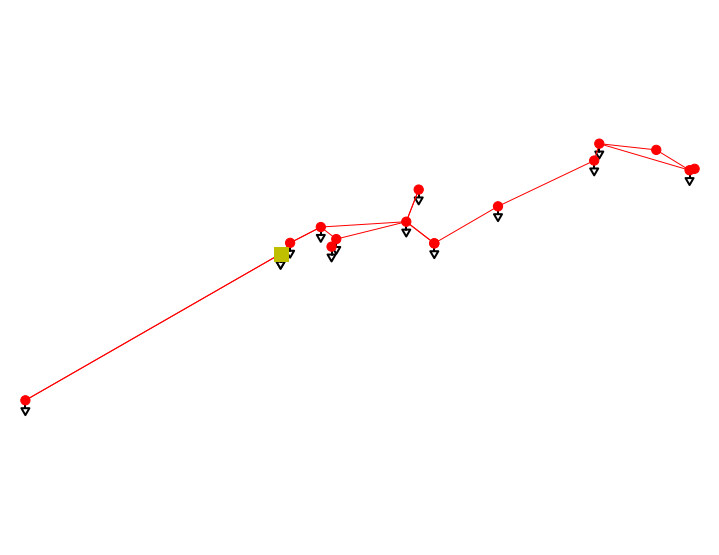

In [10]:
pp.runpp(net)



##pp.to_excel(net, 'ppnet1320.xlsx')
pp.plotting.simple_plot(net, respect_switches=False, line_width=1.0, bus_size=1.0, ext_grid_size=1.0, trafo_size=1.0, \
                        plot_loads=True, plot_sgens=False, load_size=1.0, sgen_size=3.0, switch_size=1.0, switch_distance=1.0, plot_line_switches=False, scale_size=True, bus_color='r', line_color='red', trafo_color='k', ext_grid_color='y', switch_color='k', library='igraph', show_plot=True, ax=None)



#pp.plotting.create_bus_collection(net, buses=None, size=5, patch_type='circle', color=None, z=None, \
                                          #cmap=None, norm=None, infofunc=None, picker=False, bus_geodata=None, cbar_title='Bus Voltage [pu]')

#pp.plotting.create_line_collection(net, lines=None, line_geodata=None, bus_geodata=None, use_bus_geodata=True, infofunc=None, \
                                          # cmap=None, norm=None, picker=False, z=None, cbar_title='Line Loading [%]', clim=None, plot_colormap=True)

#pp.plotting.create_trafo_collection(net, trafos=None, picker=False, size=None, infofunc=None, cmap=None, norm=None, z=None, \
                                            #clim=None, cbar_title='Transformer Loading', plot_colormap=True, bus_geodata=None)

#pp.plotting.draw_collections(collections, figsize=10, ax=None, plot_colorbars=True, set_aspect=True, axes_visible=False, copy_collections=True, draw=True)


net.res_line


pp.to_json(net, "BI1320test.json")
#print(net.bus_geodata)
#print(net.res_bus)
#print(net.res_line)
#print(net.line)
#pd_bus = pd.DataFrame(net.res_bus)
#pd_line = pd.DataFrame(net.res_line)

#pq_load= ((net.load.p_mw)**2 + (net.load.q_mvar)**2)**0.5
#pq_load_sum=pq_load.sum()

#print(pq_load_sum)

#gdf_busloc = gpd.GeoDataFrame(net.bus_geodata, geometry=gpd.points_from_xy(net.bus_geodata.x, net.bus_geodata.y))







In [11]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-62.937453,-134.029522,70.950000,-16.491164,8.012547,-150.520686,0.642329,0.285107,0.642329,1.008272,1.586770,1.117468,0.610763,40.145579
1,-62.937453,-134.029522,70.950000,-16.491164,8.012547,-150.520686,0.642329,0.285107,0.642329,1.008272,1.586770,1.117468,0.610763,40.145579
2,-570.433077,59.606784,575.735007,-43.026537,5.301931,16.580247,1.505149,1.505325,1.505325,1.000000,0.000000,1.006511,1.766123,188.165612
3,-570.433077,59.606784,575.735007,-43.026537,5.301931,16.580247,1.505149,1.505325,1.505325,1.000000,0.000000,1.006511,1.766123,188.165612
4,-469.870007,19.229376,478.666464,7.599278,8.796457,26.828654,1.226138,1.226199,1.226199,1.006511,1.766123,1.024574,5.251971,153.274859
5,-469.870007,19.229376,478.666464,7.599278,8.796457,26.828654,1.226138,1.226199,1.226199,1.006511,1.766123,1.024574,5.251971,153.274859
6,-218.603206,81.473541,219.858722,-78.545803,1.255516,2.927738,0.597549,0.598583,0.598583,1.024574,5.251971,1.023575,6.304257,74.822876
7,-29.370000,-14.224537,29.380862,13.737923,0.010862,-0.486615,0.083732,0.083157,0.083732,1.022787,6.256009,1.023575,6.304257,10.466540
8,-29.370000,-14.224537,29.380862,13.737923,0.010862,-0.486615,0.083732,0.083157,0.083732,1.022787,6.256009,1.023575,6.304257,10.466540
9,-181.929723,22.858573,184.863827,-17.761787,2.934104,5.096787,0.469654,0.470914,0.470914,1.024574,5.251971,1.034957,8.312029,58.864283
